In [8]:
from context import omphalos

import numpy as np
import matplotlib as pyplot
import omphalos.file_methods as fm
import omphalos.input_file as ipf
import omphalos.generate_inputs as gi
import omphalos.run
import sys
import subprocess
import pickle
import omphalos.labels as lbls

__Remember to test your input file on its own first!__

__Remember to update your database files in /tmp__!

In [9]:
# Import a template CT input file and iterate on it to make a test set, training set, and validation set.
dataset = gi.make_dataset('rifle_box/rifle.yaml')

*** Importing template file ***
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really wrong!
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really wrong!
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really wrong!
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really wrong!
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really wrong!
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really wrong!
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really wrong!
BaseException: This is normally due to a commented line in the input file. If it is not, something has gone really

In [72]:
labels_df = lbls.secondary_precip(dataset)

In [85]:
y = labels_df.xs(0, level=1)['FeS(am)'] + labels_df.xs(0, level=1)['FeS34(am)']

In [77]:
y = labels_df.xs(0, level=1)['Goethite_DIRB']

In [82]:
labels_df.xs(0, level=1)

,X,Y,Z,Ferrihydrite_D,Goethite_DIRB,Goethite,CalciteRifle,MagnesiteRifle,FeS(am),FeS34(am),S32,S34,Fe(OH)3,C5H7O2NFe(s),C5H7O2NSO4(s),Quartz,decay_b_so4(s)
File Num,,,,,,,,,,,,,,,,,
0,5.0,0.5,0.5,NaN,0.0,0.0,-0.000044,-3.399930e-07,0.000044,0.000002,0.000012,5.508725e-07,0.0,0.000053,0.000266,-1.000000e-10,0.0
1,5.0,0.5,0.5,NaN,0.0,0.0,0.000125,-2.844066e-07,0.000038,0.000002,0.000018,7.868416e-07,0.0,0.000001,0.002194,-1.000000e-10,0.0
2,5.0,0.5,0.5,NaN,0.0,0.0,0.000182,-2.480869e-07,0.000036,0.000002,0.000019,8.471167e-07,0.0,0.000002,0.001184,-1.000000e-10,0.0
3,5.0,0.5,0.5,NaN,0.0,0.0,0.000216,-2.131733e-07,0.000035,0.000002,0.000020,8.807452e-07,0.0,0.000002,0.001184,-1.000000e-10,0.0
4,5.0,0.5,0.5,NaN,0.0,0.0,0.000240,-1.779064e-07,0.000034,0.000001,0.000020,9.079493e-07,0.0,0.000002,0.001184,-1.000000e-10,0.0
5,5.0,0.5,0.5,NaN,0.0,0.0,0.000256,-1.418154e-07,0.000033,0.000001,0.000021,9.306928e-07,0.0,0.000002,0.001184,-1.000000e-10,0.0
6,5.0,0.5,0.5,NaN,0.0,0.0,0.000269,-1.039936e-07,0.000032,0.000001,0.000022,9.543442e-07,0.0,0.000003,0.000679,-1.000000e-10,0.0
7,5.0,0.5,0.5,NaN,0.0,0.0,0.000278,-6.546555e-08,0.000031,0.000001,0.000022,9.722377e-07,0.0,0.000004,0.000679,-1.000000e-10,0.0
8,5.0,0.5,0.5,NaN,0.0,0.0,0.000284,-2.571775e-08,0.000031,0.000001,0.000022,9.879497e-07,0.0,0.000004,0.000679,-1.000000e-10,0.0


In [78]:
y.to_numpy()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [6]:
import matplotlib.pyplot as plt

In [33]:
7.2

7.2

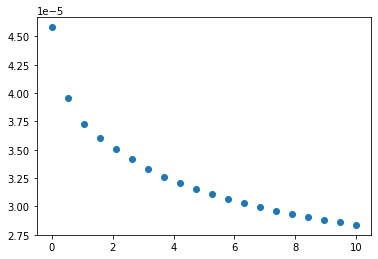

In [86]:
plt.scatter(np.linspace(0,10,20) ,y)

In [54]:
dataset[23].results.results_dict['AqRate']['Sulfate_reduct'][0]

0    0.0
Name: Sulfate_reduct, dtype: float64

In [59]:
dataset[i].results.results_dict['pH']['pH'][0]

8.21819218

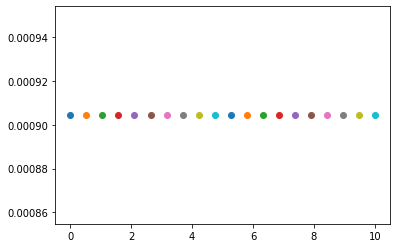

In [9]:
range = np.linspace(0,10,20)
for i in dataset:
    plt.scatter(range[i], dataset[i].results.results_dict['volume']['Goethite_DIRB'][0])

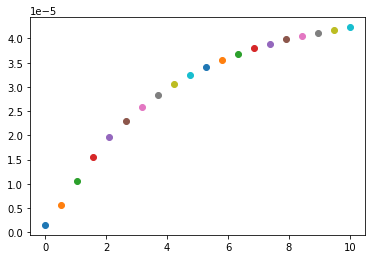

In [16]:
range = np.linspace(0,10,20)
for i in dataset:
    plt.scatter(range[i], dataset[i].results.results_dict['totcon']['Fe++'][0])

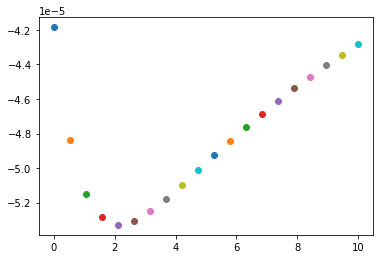

In [11]:
range = np.linspace(0,10,20)
for i in dataset:
    plt.scatter(range[i], dataset[i].results.results_dict['volume']['Ferrihydrite_D'][0]-3e-3)

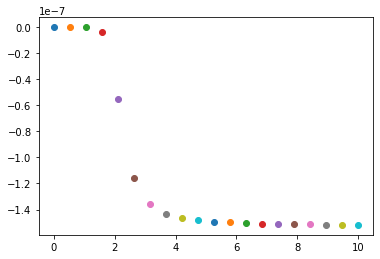

In [15]:
range = np.linspace(0,10,20)
for i in dataset:
    plt.scatter(range[i], dataset[i].results.results_dict['rate']['Ferrihydrite_D'][0])

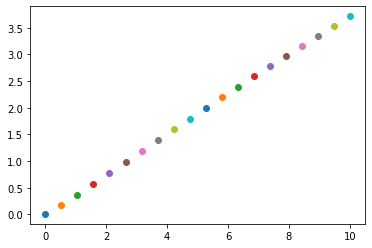

In [13]:
range = np.linspace(0,10,20)
for i in dataset:
    plt.scatter(range[i], dataset[i].results.results_dict['totcon']['CO2(aq)'][0])

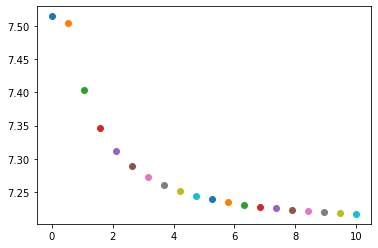

In [14]:
range = np.linspace(0,10,20)

for i in dataset:
    plt.scatter(range[i], dataset[i].results.results_dict['pH']['pH'][0])

In [19]:
dataset[1].results.results_dict['rate']

,X,Y,Z,Ferrihydrite_D,Goethite_DIRB,Goethite,CalciteRifle,MagnesiteRifle,FeS(am),FeS34(am),S32,S34,Fe(OH)3,C5H7O2NFe(s),C5H7O2NSO4(s),Quartz,decay_b_so4(s)
0,5.0,0.5,0.5,-3.662958e-14,-1.846208e-47,2.490945e-28,6.144292e-08,-2.554200e-09,1.912517e-16,8.730858e-18,-1.522502e-18,-6.950556e-20,2.836763e-18,1.207923e-15,0.0,8.279444e-36,-1.220124e-08


7.5

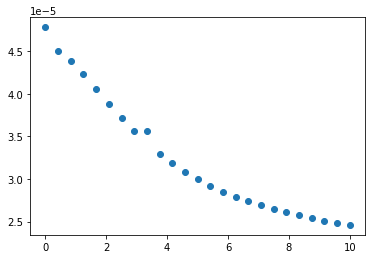

In [25]:
plt.scatter(np.linspace(0,10,25) ,y)

6.5

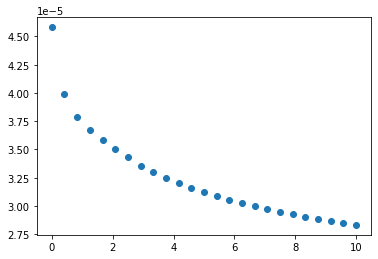

In [32]:
plt.scatter(np.linspace(0,10,25) ,y)

pH var, no CO2

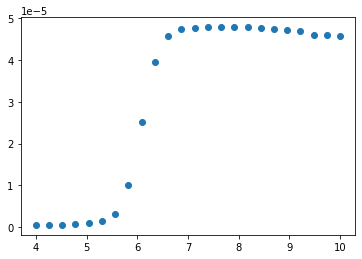

In [39]:
plt.scatter(np.linspace(4,10,24) ,y)